In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import numpy as np
import matplotlib.dates as mdates

/tmp/ipykernel_56299/2527831322.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips_by_city = trips_by_city.append({'city': city, 'to': trips_to_city, 'from': trips_from_city, 'total': total_trips}, ignore_index=True)
/tmp/ipykernel_56299/2527831322.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips_by_city = trips_by_city.append({'city': city, 'to': trips_to_city, 'from': trips_from_city, 'total': total_trips}, ignore_index=True)
/tmp/ipykernel_56299/2527831322.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips_by_city = trips_by_city.append({'city': city, 'to': trips_to_city, 'from': trips_from_city, 'total': total_trips}, ignore_index=True)
/tmp/ipykernel_56299/2527831322.py:13: FutureWarning: The 

/tmp/ipykernel_56299/2527831322.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips_by_city = trips_by_city.append({'city': city, 'to': trips_to_city, 'from': trips_from_city, 'total': total_trips}, ignore_index=True)
/tmp/ipykernel_56299/2527831322.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips_by_city = trips_by_city.append({'city': city, 'to': trips_to_city, 'from': trips_from_city, 'total': total_trips}, ignore_index=True)
/tmp/ipykernel_56299/2527831322.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trips_by_city = trips_by_city.append({'city': city, 'to': trips_to_city, 'from': trips_from_city, 'total': total_trips}, ignore_index=True)
/tmp/ipykernel_56299/2527831322.py:13: FutureWarning: The 

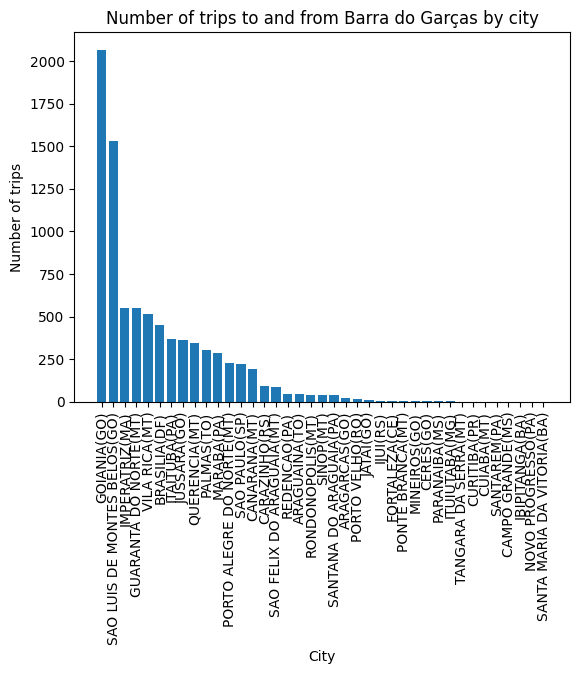

In [34]:
# create a new dataframe to count trips by city
trips_by_city = pd.DataFrame(columns=['city', 'total'])
cities = pd.concat([df['municipio_origem'], df['municipio_destino']]).unique()

for city in cities:
    if 'BARRA DO GARCAS(MT)' not in city:
        # count trips to and from the city
        trips_to_city = len(df[(df['municipio_destino'] == city) & (df['sentido_linha'] == 0)]) + len(df[(df['municipio_origem'] == city) & (df['sentido_linha'] == 1)])
        trips_from_city = len(df[(df['municipio_origem'] == city) & (df['sentido_linha'] == 0)]) + len(df[(df['municipio_destino'] == city) & (df['sentido_linha'] == 1)])
        total_trips = trips_to_city + trips_from_city

        # add the city and trip count to the dataframe
        trips_by_city = trips_by_city.append({'city': city, 'to': trips_to_city, 'from': trips_from_city, 'total': total_trips}, ignore_index=True)

# sort the dataframe by trip count
trips_by_city = trips_by_city.sort_values(by='total', ascending=False)

# create a bar chart
plt.bar(trips_by_city['city'], trips_by_city['total'])
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Number of trips')
plt.title('Number of trips to and from Barra do Garças by city')
plt.show()


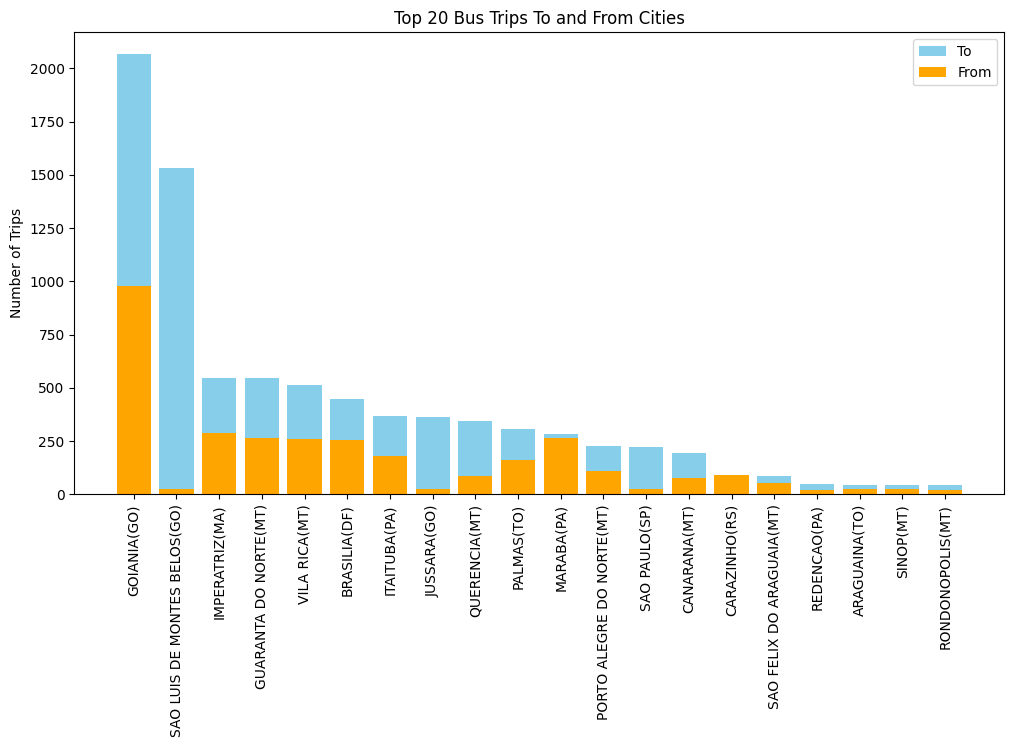

In [39]:
# Sort the DataFrame by the "total" column in descending order and select the top 20 cities
trips_by_city = trips_by_city.sort_values(by='total', ascending=False).head(20)

# Create an array for the x-axis positions
x = np.arange(len(trips_by_city))

# Set the width of the bar
bar_width = 0.8

# Plot the bar with separated colors
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x, trips_by_city['total'], width=bar_width, align='center', color=['skyblue'] * len(trips_by_city))
ax.bar(x, trips_by_city['from'], width=bar_width, align='center', color='orange')

# Set the x-axis tick positions and labels
ax.set_xticks(x)
ax.set_xticklabels(trips_by_city['city'], rotation=90)

# Set the y-axis label and title
ax.set_ylabel("Number of Trips")
ax.set_title("Top 20 Bus Trips To and From Cities")

# Add a legend
ax.legend(['To', 'From'])

# Show the chart
plt.show()

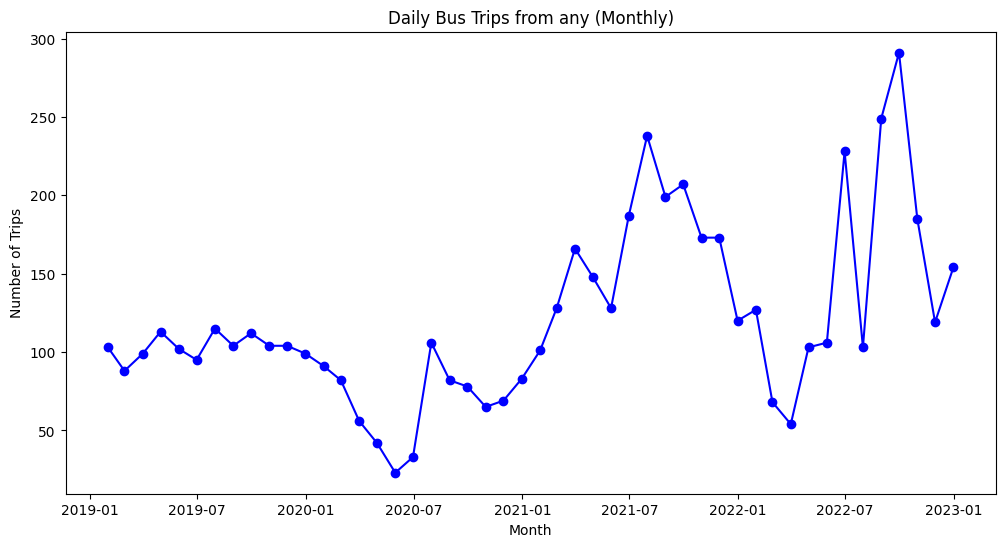

In [72]:
plot_destiny_city('any', 'monthly', df)

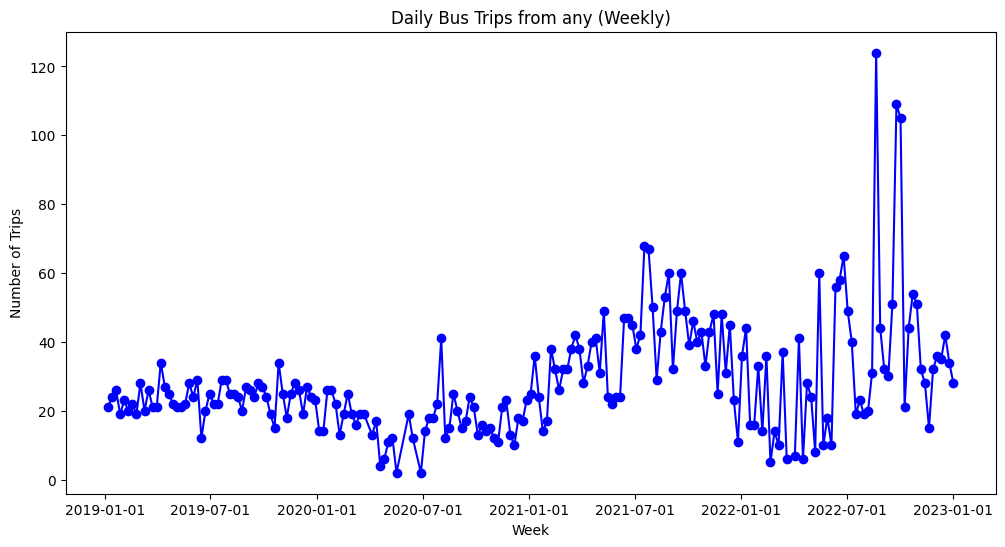

In [77]:
plot_origin_city('any', 'weekly', df)

In [19]:
# Load data from each year's CSV file into a separate DataFrame
df_2019 = pd.read_csv('viagem_regular_2019.csv')
df_2019['municipio_origem'] = df_2019['municipio_origem'].str.strip()
df_2019['municipio_destino'] = df_2019['municipio_destino'].str.strip()
df_2020 = pd.read_csv('viagem_regular_2020.csv')
df_2020['municipio_origem'] = df_2020['municipio_origem'].str.strip()
df_2020['municipio_destino'] = df_2020['municipio_destino'].str.strip()
df_2021 = pd.read_csv('viagem_regular_2021.csv')
df_2021['municipio_origem'] = df_2021['municipio_origem'].str.strip()
df_2021['municipio_destino'] = df_2021['municipio_destino'].str.strip()
df_2022 = pd.read_csv('viagem_regular_2022.csv')
df_2022['municipio_origem'] = df_2022['municipio_origem'].str.strip()
df_2022['municipio_destino'] = df_2022['municipio_destino'].str.strip()

# Add a 'year' column to each DataFrame to identify the year of the data
df_2019['year'] = 2019
df_2020['year'] = 2020
df_2021['year'] = 2021
df_2022['year'] = 2022

# Concatenate the separate DataFrames into a single DataFrame
df = pd.concat([df_2019, df_2020, df_2021, df_2022], ignore_index=True)

In [80]:
trips_by_city

,city,total,to,from
0,GOIANIA(GO),2066,1090.0,976.0
5,SAO LUIS DE MONTES BELOS(GO),1530,1505.0,25.0
31,IMPERATRIZ(MA),548,262.0,286.0
15,GUARANTA DO NORTE(MT),548,286.0,262.0
17,VILA RICA(MT),513,254.0,259.0
4,BRASILIA(DF),449,193.0,256.0
21,ITAITUBA(PA),369,191.0,178.0
2,JUSSARA(GO),362,338.0,24.0
11,QUERENCIA(MT),343,256.0,87.0
24,PALMAS(TO),305,146.0,159.0


In [79]:
counts = barra_trips['municipio_origem'].value_counts().sort_values(ascending=False)
counts

GOIANIA(GO)                      2024
SAO LUIS DE MONTES BELOS(GO)     1530
GUARANTA DO NORTE(MT)             548
JUSSARA(GO)                       362
BRASILIA(DF)                      300
MARABA(PA)                        284
PORTO ALEGRE DO NORTE(MT)         229
BARRA DO GARCAS(MT)               224
QUERENCIA(MT)                      92
REDENCAO(PA)                       43
RONDONOPOLIS(MT)                   42
VILA RICA(MT)                      39
SANTANA DO ARAGUAIA(PA)            39
ITAITUBA(PA)                       15
JATAI(GO)                          12
IJUI(RS)                            5
FORTALEZA(CE)                       4
ITUIUTABA(MG)                       2
PARANAIBA(MS)                       2
CERES(GO)                           2
MINEIROS(GO)                        2
CAMPO GRANDE(MS)                    1
SANTAREM(PA)                        1
SAO PAULO(SP)                       1
Name: municipio_origem, dtype: int64

TypeError: can only concatenate str (not "int") to str

<Figure size 1000x500 with 0 Axes>

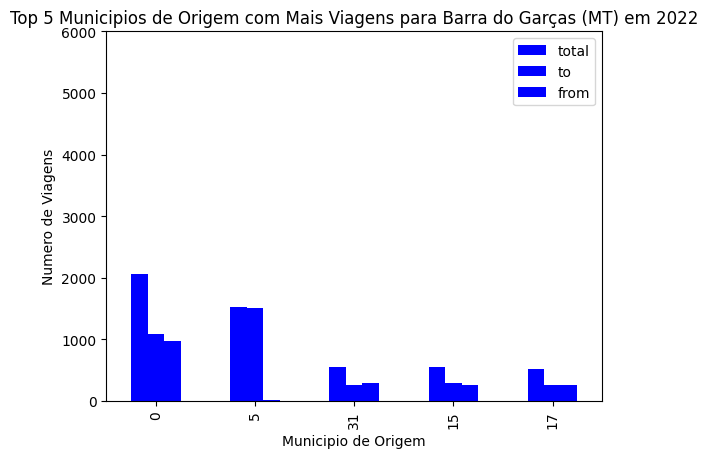

In [78]:
counts = barra_trips['municipio_origem'].value_counts().sort_values(ascending=False)


top_5 = counts[:5]
remaining = counts[5:]

# Plot top 5 municipios
plt.figure(figsize=(10,5))
top_5.plot(kind='bar', color='blue')
plt.title('Top 5 Municipios de Origem com Mais Viagens para Barra do Garças (MT) em 2022')
plt.xlabel('Municipio de Origem')
plt.ylabel('Numero de Viagens')
plt.ylim(top=6000) # adjust y-axis limit if necessary

# Add counts inside the bars
for i, v in enumerate(top_5.values):
    plt.text(i-0.25, v+200, str(v), color='black')

plt.show()

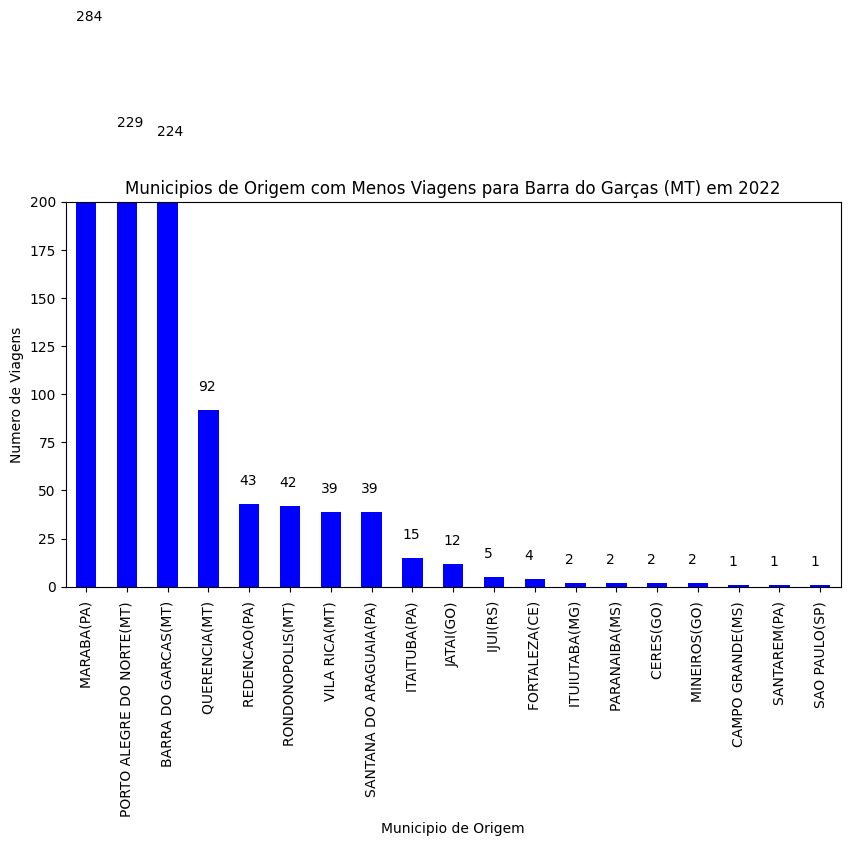

In [5]:
# Plot remaining municipios
plt.figure(figsize=(10,5))
remaining.plot(kind='bar', color='blue')
plt.title('Municipios de Origem com Menos Viagens para Barra do Garças (MT) em 2022')
plt.xlabel('Municipio de Origem')
plt.ylabel('Numero de Viagens')
plt.ylim(top=200) # adjust y-axis limit if necessary

# Add counts inside the bars
for i, v in enumerate(remaining.values):
    plt.text(i-0.25, v+10, str(v), color='black')

plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

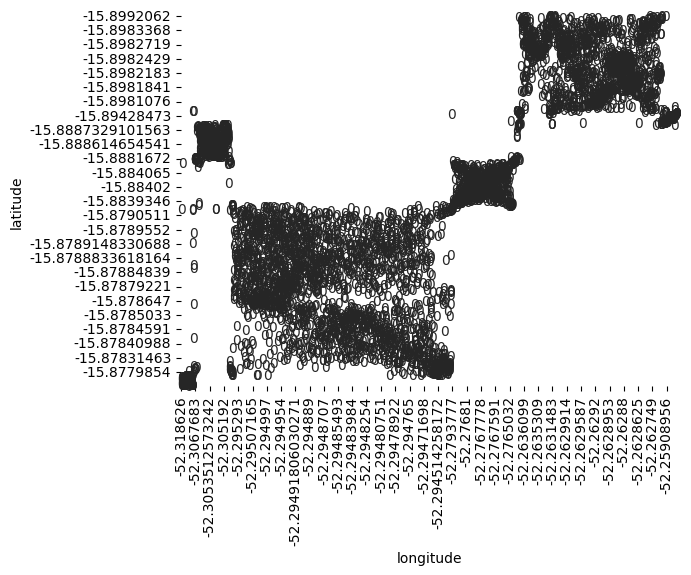

In [6]:
# Create a new column to indicate whether the bus stop is in Barra do Garças or not
df_all['is_bdg'] = df_all.apply(lambda row: 'Barra do Garças' in row['municipio_origem'] or 'Barra do Garças' in row['municipio_destino'], axis=1)

# Create a pivot table to count the number of bus stops in each longitude-latitude coordinate
table = df_all.pivot_table(values='is_bdg', index=['latitude'], columns=['longitude'], aggfunc='sum')

# Create a heatmap using seaborn
sns.heatmap(table, cmap='Blues', annot=True, fmt='.0f', cbar=False)

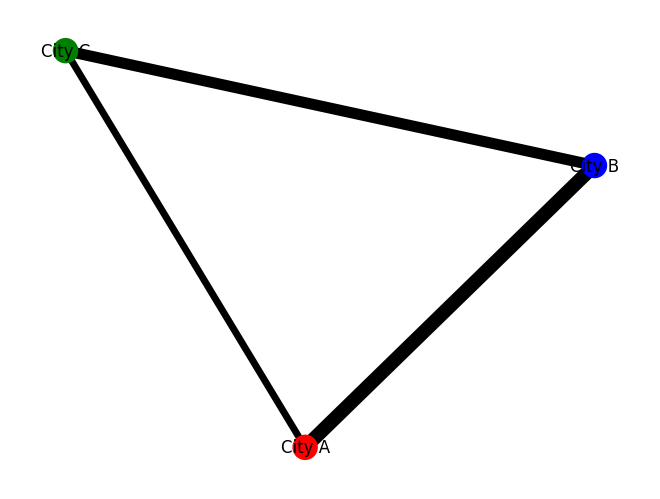

In [9]:
import networkx as nx

G = nx.Graph()

G.add_node('City A')
G.add_node('City B')
G.add_node('City C')

G.add_edge('City A', 'City B')
G.add_edge('City A', 'City C')
G.add_edge('City B', 'City C')

# set node attributes
G.nodes['City A']['color'] = 'red'
G.nodes['City B']['color'] = 'blue'
G.nodes['City C']['color'] = 'green'

# set edge attributes
G.edges[('City A', 'City B')]['weight'] = 10
G.edges[('City A', 'City C')]['weight'] = 5
G.edges[('City B', 'City C')]['weight'] = 8

# get node colors and edge weights
node_colors = [G.nodes[n]['color'] for n in G.nodes]
edge_weights = [G.edges[e]['weight'] for e in G.edges]

# draw the graph
nx.draw(G, node_color=node_colors, width=edge_weights, with_labels=True)
plt.show()


In [43]:
#import geopandas as gpd
# Load a map of Brazil with geopandas
brazil_map = gpd.read_file('BR_map/BR_Municipios_2022.shp')

brazil_map['lon_lat'] = brazil_map['geometry'].apply(lambda x: (x.centroid.x, x.centroid.y))

In [48]:
from unidecode import unidecode

def clean_city_name(city):
    city = city.split("(")[0].strip() # remove state acronym
    city = unidecode(city.lower()) # remove accents and convert to lowercase
    return city

In [49]:
# Clean city names in CSV
df_all['municipio_origem_clean'] = df_all['municipio_origem'].apply(clean_city_name)
df_all['municipio_destino_clean'] = df_all['municipio_destino'].apply(clean_city_name)

# Clean city names in brazil_map
brazil_map['NM_MUN_CLEAN'] = brazil_map['NM_MUN'].apply(clean_city_name)

In [129]:
for node_id, data in G.nodes(data=True):
    print(node_id, data, len(data))

 BARRA DO GARCAS(MT) {'pos': (-16.643550884377632, -49.27378452372326)} 1
BARRA DO GARCAS(MT)  {'pos': (-16.643550884377632, -49.27378452372326)} 1
MARABA(PA)  {'pos': (-16.643550884377632, -49.27378452372326)} 1
GOIANIA(GO)  {'pos': (-16.643550884377632, -49.27378452372326)} 1
 SAO FELIX DO ARAGUAIA(MT) {'pos': (-16.643550884377632, -49.27378452372326)} 1
SANTANA DO ARAGUAIA(PA)  {'pos': (-16.643550884377632, -49.27378452372326)} 1
 PORTO VELHO(RO) {'pos': (-16.643550884377632, -49.27378452372326)} 1
BRASILIA(DF)  {'pos': (-16.643550884377632, -49.27378452372326)} 1
 SAO PAULO(SP) {'pos': (-16.643550884377632, -49.27378452372326)} 1
SAO LUIS DE MONTES BELOS(GO)  {'pos': (-16.643550884377632, -49.27378452372326)} 1
PORTO ALEGRE DO NORTE(MT)  {'pos': (-16.643550884377632, -49.27378452372326)} 1
ITUIUTABA(MG)  {'pos': (-16.643550884377632, -49.27378452372326)} 1
 SINOP(MT) {'pos': (-16.643550884377632, -49.27378452372326)} 1
 VILA RICA(MT) {'pos': (-16.643550884377632, -49.27378452372326

In [132]:
# Extract the latitude and longitude of each municipality from the map
municipalities = pd.concat([df_all['municipio_origem_clean'], df_all['municipio_destino_clean']]).unique()
latitudes = []
longitudes = []
municipios_dic = {}
for m in municipalities:
    long = brazil_map[brazil_map['NM_MUN_CLEAN'] == m]['lon_lat'].values[0][0]
    longitudes.append(long)
    lat = brazil_map[brazil_map['NM_MUN_CLEAN'] == m]['lon_lat'].values[0][1]
    latitudes.append(lat)
    municipios_dic[m] = (long,lat)
#municipalities_df = pd.DataFrame({'NM_MUN': municipalities, 'latitude': latitudes, 'longitude': longitudes})

# Create a new dataframe for the edges
# Create a dictionary of edges and their counts
edges = {}
for index, row in df_all.iterrows():
    source = row['municipio_origem']
    target = row['municipio_destino']
    key = (source, target)
    if key not in edges:
        edges[key] = 1
    else:
        edges[key] += 1

# Create the graph with networkx
G = nx.DiGraph()

# Add nodes to the graph
nodes = {}
for i, row in df_all.iterrows():
    if row['sentido_linha'] == 0:
        node_id = row['municipio_origem']
        nodes[node_id] = (municipalities_df['latitude'][municipalities_df.NM_MUN.ne(node_id).idxmax()],municipalities_df['longitude'][municipalities_df.NM_MUN.ne(node_id).idxmax()])
    else:
        node_id = row['municipio_destino']
        nodes[node_id] = (municipalities_df['latitude'][municipalities_df.NM_MUN.ne(node_id).idxmax()],municipalities_df['longitude'][municipalities_df.NM_MUN.ne(node_id).idxmax()])
    G.add_node(node_id, pos=nodes[node_id])

# Add edges to the graph
for i, row in df_all.iterrows():
    if row['sentido_linha'] == 0 and (edges.get((row['municipio_origem'],row['municipio_destino'])) is not None):
        G.add_edge(row['municipio_origem'], row['municipio_destino'], weight=edges[(row['municipio_origem'],row['municipio_destino'])])
    elif row['sentido_linha'] == 1 and (edges.get((row['municipio_destino'],row['municipio_origem'])) is not None):
        G.add_edge(row['municipio_destino'], row['municipio_origem'], weight=edges[(row['municipio_destino'],row['municipio_origem'])])

# Draw the map
m = folium.Map(location=[-16.6777158, -49.2676304], zoom_start=5)

# Draw the edges on the map
for edge in edges:
    weight = edges[edge]
    folium.PolyLine(locations=[municipios_dic[clean_city_name(edge[0])], municipios_dic[clean_city_name(edge[1])]], weight=weight/10, color='blue', opacity=0.5).add_to(m)

# Draw the nodes on the map
for node_id, data in G.nodes(data=True):
    if len(data) > 0:
        folium.CircleMarker(location=data['pos'], radius=5, color='red', fill=True, fill_color='red', fill_opacity=0.7).add_to(m)

# Save the map to an HTML file
m.save('bus_routes2.html')

Text(0.5, 1.0, 'Traffic Flow of Buses Arriving and Leaving Barra do Garças')

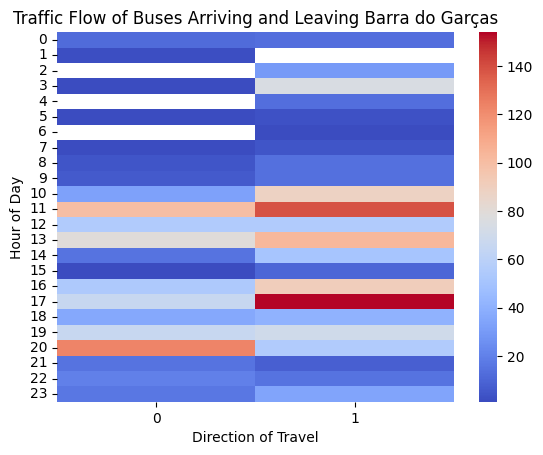

In [23]:
# Filter the data to include only buses arriving or leaving Barra do Garças
#df = df[(df['municipio_origem'] == 'BARRA DO GARCAS(MT)') | (df['municipio_destino'] == 'BARRA DO GARCAS(MT)')]

# Convert the date columns to datetime format
df['data_inicio_viagem'] = pd.to_datetime(df['data_inicio_viagem'])
df['data_fim_viagem'] = pd.to_datetime(df['data_fim_viagem'])

# Create a new column with the hour of the day for each trip start time
df['hora_partida'] = df['data_inicio_viagem'].dt.hour

# Create a pivot table with the number of trips for each hour of the day and direction of travel
pt = df.pivot_table(index='hora_partida', columns='sentido_linha', values='index', aggfunc='count')

# Create a heatmap of the pivot table
sns.heatmap(pt, cmap='coolwarm')

# Set the axis labels and title
plt.xlabel('Direction of Travel')
plt.ylabel('Hour of Day')
plt.title('Traffic Flow of Buses Arriving and Leaving Barra do Garças')


In [76]:
def plot_origin_city(city, granularity, df):
    # Filter the dataframe for trips from the specified city
    if city == 'any':
        trips_city = df
    else:
        trips_city = df[((df['municipio_origem'] == city) & (df['sentido_linha'] == 0)) | ((df['municipio_destino'] == city) & (df['sentido_linha'] == 1))]

    # Convert the 'data_inicio_viagem' column to datetime
    trips_city['data_inicio_viagem'] = pd.to_datetime(trips_city['data_inicio_viagem'])

    # Group the data by date and count the number of trips
    if granularity == 'daily':
        trips_by_time = trips_city.groupby(trips_city['data_inicio_viagem'].dt.date).size()
        xlabel = 'Date'
        date_format = '%Y-%m-%d'
    elif granularity == 'weekly':
        trips_by_time = trips_city.groupby(trips_city['data_inicio_viagem'].dt.to_period('W')).size()
        xlabel = 'Week'
        date_format = '%Y-%m-%d'
    elif granularity == 'monthly':
        trips_by_time = trips_city.groupby(trips_city['data_inicio_viagem'].dt.to_period('M')).size()
        xlabel = 'Month'
        date_format = '%Y-%m'
    elif granularity == 'annual':
        trips_by_time = trips_city.groupby(trips_city['data_inicio_viagem'].dt.to_period('Y')).size()
        xlabel = 'Year'
        date_format = '%Y'

    # Remove time periods with zero trips
    #trips_by_time = trips_by_time[trips_by_time != 0]

    # Convert dates to numerical format
    dates = mdates.date2num(trips_by_time.index)

    # Plot the line chart
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(dates, trips_by_time.values, marker='o', linestyle='-', color='blue')

    # Format the x-axis tick labels as dates
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter(date_format))

    # Set the x-axis label, y-axis label, and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Number of Trips")
    ax.set_title(f"Daily Bus Trips from {city} ({granularity.capitalize()})")

    # Show the chart
    plt.show()


In [75]:
def plot_destiny_city(city, granularity, df):
    # Filter the dataframe for trips from the specified city
    if city == 'any':
        trips_city = df
    else:
        trips_city = df[((df['municipio_destino'] == city) & (df['sentido_linha'] == 0)) | ((df['municipio_origem'] == city) & (df['sentido_linha'] == 1))]

    # Convert the 'data_inicio_viagem' column to datetime
    trips_city['data_inicio_viagem'] = pd.to_datetime(trips_city['data_inicio_viagem'])

    # Group the data by date and count the number of trips
    if granularity == 'daily':
        trips_by_time = trips_city.groupby(trips_city['data_inicio_viagem'].dt.date).size()
        xlabel = 'Date'
        date_format = '%Y-%m-%d'
    elif granularity == 'weekly':
        trips_by_time = trips_city.groupby(trips_city['data_inicio_viagem'].dt.to_period('W')).size()
        xlabel = 'Week'
        date_format = '%Y-%m-%d'
    elif granularity == 'monthly':
        trips_by_time = trips_city.groupby(trips_city['data_inicio_viagem'].dt.to_period('M')).size()
        xlabel = 'Month'
        date_format = '%Y-%m'
    elif granularity == 'annual':
        trips_by_time = trips_city.groupby(trips_city['data_inicio_viagem'].dt.to_period('Y')).size()
        xlabel = 'Year'
        date_format = '%Y'

    # Remove time periods with zero trips
    #trips_by_time = trips_by_time[trips_by_time != 0]

    # Convert dates to numerical format
    dates = mdates.date2num(trips_by_time.index)

    # Plot the line chart
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(dates, trips_by_time.values, marker='o', linestyle='-', color='blue')

    # Format the x-axis tick labels as dates
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter(date_format))

    # Set the x-axis label, y-axis label, and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Number of Trips")
    ax.set_title(f"Daily Bus Trips from {city} ({granularity.capitalize()})")

    # Show the chart
    plt.show()


In [81]:
def plot_top_cities(df):
    # Select the top five cities based on the 'from' column
    top_from_cities = df.nlargest(5, 'from')

    # Select the top five cities based on the 'to' column
    top_to_cities = df.nlargest(5, 'to')

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # Plot the top five 'from' cities
    ax1.bar(top_from_cities['city'], top_from_cities['from'], color='blue')
    ax1.set_title('Top 5 Cities - "From" Trips')
    ax1.set_ylabel('Number of Trips')
    ax1.set_xticklabels(top_from_cities['city'], rotation=45)

    # Plot the top five 'to' cities
    ax2.bar(top_to_cities['city'], top_to_cities['to'], color='green')
    ax2.set_title('Top 5 Cities - "To" Trips')
    ax2.set_ylabel('Number of Trips')
    ax2.set_xticklabels(top_to_cities['city'], rotation=45)

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the chart
    plt.show()


/tmp/ipykernel_56299/3561625408.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_from_cities['city'], rotation=45)
/tmp/ipykernel_56299/3561625408.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(top_to_cities['city'], rotation=45)


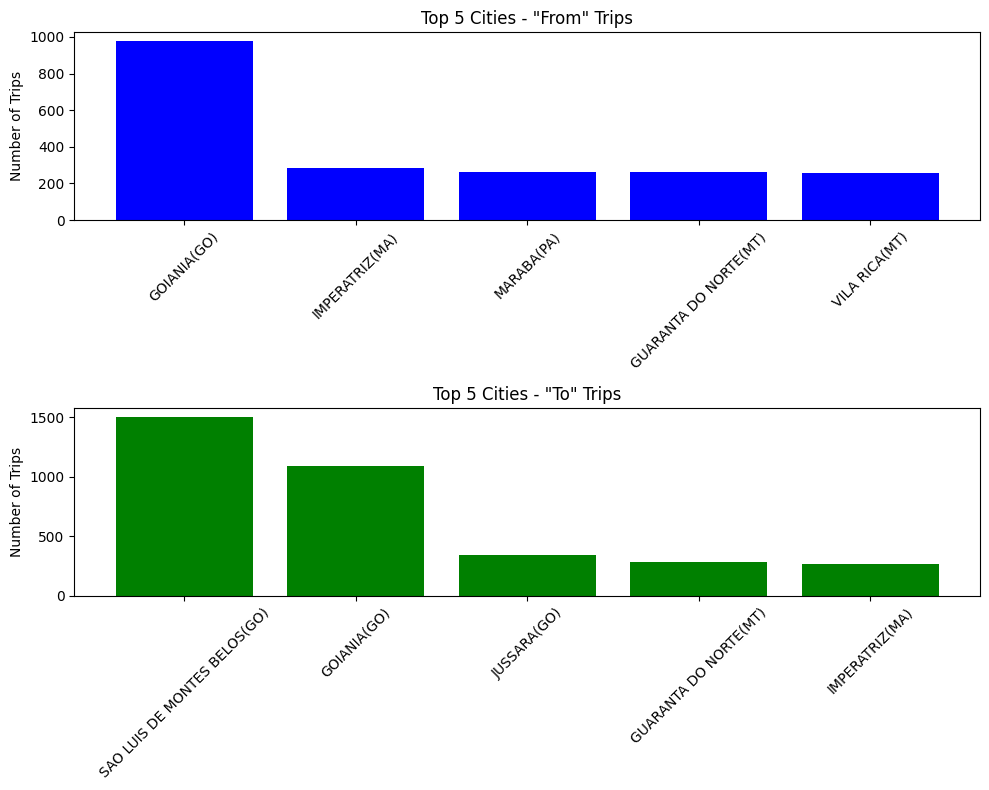

In [82]:
plot_top_cities(trips_by_city)

In [148]:
def plot_trips_with_covid(city, granularity, df_trips, df_covid):
    # Filter the trips dataframe for trips from the specified city
    trips_city = df_trips[
        ((df_trips['municipio_origem'] == city) & (df_trips['sentido_linha'] == 0)) |
        ((df_trips['municipio_destino'] == city) & (df_trips['sentido_linha'] == 1))
    ]

    # Convert the 'data_inicio_viagem' column to datetime
    trips_city['data_inicio_viagem'] = pd.to_datetime(trips_city['data_inicio_viagem'])

    # Group the trips data based on the granularity
    if granularity == 'daily':
        trips_by_time = trips_city.groupby(trips_city['data_inicio_viagem'].dt.date).size()
        xlabel = 'Date'
        date_format = '%Y-%m-%d'
    elif granularity == 'weekly':
        trips_by_time = trips_city.groupby(trips_city['data_inicio_viagem'].dt.to_period('W')).size()
        xlabel = 'Week'
        date_format = '%Y-%m-%d'
    elif granularity == 'monthly':
        trips_by_time = trips_city.groupby(trips_city['data_inicio_viagem'].dt.to_period('M')).size()
        xlabel = 'Month'
        date_format = '%Y-%m'
    elif granularity == 'annual':
        trips_by_time = trips_city.groupby(trips_city['data_inicio_viagem'].dt.to_period('Y')).size()
        xlabel = 'Year'
        date_format = '%Y'

    # Remove time periods with zero trips
    trips_by_time = trips_by_time[trips_by_time != 0]

    # Get the corresponding COVID-19 cases data for the specified city and granularity
    #df_covid['date'] = pd.to_datetime(df_covid['date'])

    covid_by_time = df_covid.groupby(df_covid['date'].dt.date).sum()['confirmed']

    # Find the common date range for trips and COVID-19 cases
    common_dates = pd.Index(list(set(trips_by_time.index) & set(covid_by_time.index)))

    # Filter trips and COVID-19 cases based on the common date range
    trips_by_time = trips_by_time.loc[common_dates]
    covid_by_time = covid_by_time.loc[common_dates]

    # Convert dates to numerical format
    dates = pd.to_datetime(common_dates)
    dates = dates.sort_values()
    
    # Plot the line chart for trips
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(dates, trips_by_time.values, marker='o', linestyle='-', color='blue', label='Trips')

    # Set the x-axis label, y-axis label, and title for trips chart
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Number of Trips")
    ax.set_title(f"Trips from {city} ({granularity.capitalize()})")

    # Show the legend for trips chart
    ax.legend()
    
    
    # Create a separate subplot for COVID-19 cases
    ax2 = ax.twinx()

    # Plot the line chart for COVID-19 cases
    ax2.plot(dates, covid_by_time.values, marker='o', linestyle='-', color='red', label='COVID-19 Cases')

    # Set the y-axis label for COVID-19 cases
    ax2.set_ylabel("Number of COVID-19 Cases")

    # Show the legend for COVID-19 cases
    ax2.legend(loc='upper right')

    # Format the x-axis tick labels as dates
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter(date_format))


    # Show the chart
    plt.show()


In [124]:
bg_casos = pd.read_csv('bg_casos.csv')

In [145]:
city = 'GOIANIA(GO)'
trips_city = df[
        ((df['municipio_origem'] == city) & (df['sentido_linha'] == 0)) |
        ((df['municipio_destino'] == city) & (df['sentido_linha'] == 1))
    ]

trips_city['data_inicio_viagem'] = pd.to_datetime(trips_city['data_inicio_viagem'])


trips_by_time = trips_city.groupby(trips_city['data_inicio_viagem'].dt.date).size()

bg_casos['date'] = pd.to_datetime(bg_casos['date'])

covid_by_time = bg_casos.groupby(bg_casos['date'].dt.date).sum()['confirmed']

# Find the common date range for trips and COVID-19 cases
common_dates = pd.Index(list(set(trips_by_time.index) & set(covid_by_time.index)))
dates = pd.to_datetime(common_dates)
dates = dates.sort_values()
dates

/tmp/ipykernel_56299/711950150.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips_city['data_inicio_viagem'] = pd.to_datetime(trips_city['data_inicio_viagem'])
/tmp/ipykernel_56299/711950150.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  covid_by_time = bg_casos.groupby(bg_casos['date'].dt.date).sum()['confirmed']


DatetimeIndex(['2020-05-02', '2020-05-03', '2020-06-01', '2020-06-02',
               '2020-06-03', '2020-07-01', '2020-07-02', '2020-07-03',
               '2020-08-01', '2020-08-02',
               ...
               '2022-02-25', '2022-03-01', '2022-03-02', '2022-03-05',
               '2022-03-06', '2022-03-08', '2022-03-10', '2022-03-14',
               '2022-03-15', '2022-03-16'],
              dtype='datetime64[ns]', length=244, freq=None)

/tmp/ipykernel_56299/1995881544.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips_city['data_inicio_viagem'] = pd.to_datetime(trips_city['data_inicio_viagem'])
/tmp/ipykernel_56299/1995881544.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  covid_by_time = df_covid.groupby(df_covid['date'].dt.date).sum()['confirmed']


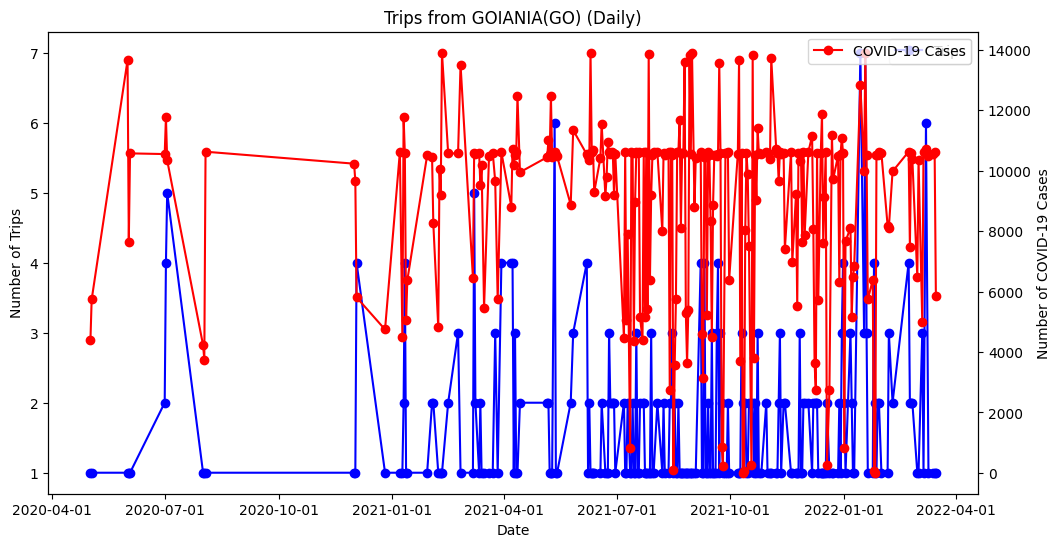

In [149]:
plot_trips_with_covid('GOIANIA(GO)', 'daily', df, bg_casos)